In [1]:
### Importing the libraries and the modules
import pandas as pd
import numpy as np
import requests
from io import BytesIO
import json
import tweepy

# for viz

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

## Gathering data stage

In [2]:
# first, twitter archives:
twitter_df = pd.read_csv('twitter-archive-enhanced.csv')
# Image predictions TSV fle
data = requests.get('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv')
img_pred_df = pd.read_csv(BytesIO(data.content), sep = '\t')
img_pred_df.to_csv('image-predictions.tsv', sep='\t', )

In [4]:
#### Fetching Twitter data using the API

In [15]:
consumer_key = ''
consumer_secret = ''
access_token = ''
access_secret = ''
# setting up the API
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

# Using the API to fetch the data and save it in a text file
with open("tweet_json.txt", "w") as outfile:
    for tweet_id in twitter_df['tweet_id']:
        try:
            tweet = api.get_status(tweet_id, tweet_mode = 'extended')
            json.dump(tweet._json, outfile)
            outfile.write("\n")
        except Exception as e:
            print(str(tweet_id) + str(e))

888202515573088257[{'code': 144, 'message': 'No status found with that ID.'}]
873697596434513921[{'code': 144, 'message': 'No status found with that ID.'}]
872668790621863937[{'code': 144, 'message': 'No status found with that ID.'}]
872261713294495745[{'code': 144, 'message': 'No status found with that ID.'}]
869988702071779329[{'code': 144, 'message': 'No status found with that ID.'}]
866816280283807744[{'code': 144, 'message': 'No status found with that ID.'}]
861769973181624320[{'code': 144, 'message': 'No status found with that ID.'}]
856602993587888130[{'code': 144, 'message': 'No status found with that ID.'}]
851953902622658560[{'code': 144, 'message': 'No status found with that ID.'}]
845459076796616705[{'code': 144, 'message': 'No status found with that ID.'}]
844704788403113984[{'code': 144, 'message': 'No status found with that ID.'}]
842892208864923648[{'code': 144, 'message': 'No status found with that ID.'}]
837366284874571778[{'code': 144, 'message': 'No status found wit

Rate limit reached. Sleeping for: 346


754011816964026368[{'code': 144, 'message': 'No status found with that ID.'}]
680055455951884288[{'code': 144, 'message': 'No status found with that ID.'}]


Rate limit reached. Sleeping for: 336


In [3]:
data = []
with open('tweet_json.txt', 'r') as readfile: 
    tweet_json = readfile.readline()
    while tweet_json:
        tweet_dict = json.loads(tweet_json)
        data.append(tweet_dict)
        tweet_json = readfile.readline()
        
api_df = pd.DataFrame.from_dict(data)

Done gathering for now, I don't know if I would come back or not, but let's prceed

# Assessing stage

In [4]:
api_df.head()

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,Tue Aug 01 16:23:56 +0000 2017,892420643555336193,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,39467,False,False,False,False,en,NaN,NaN,NaN,NaN
1,Tue Aug 01 00:17:27 +0000 2017,892177421306343426,892177421306343426,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,33819,False,False,False,False,en,NaN,NaN,NaN,NaN
2,Mon Jul 31 00:18:03 +0000 2017,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,25461,False,False,False,False,en,NaN,NaN,NaN,NaN
3,Sun Jul 30 15:58:51 +0000 2017,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,42908,False,False,False,False,en,NaN,NaN,NaN,NaN
4,Sat Jul 29 16:00:24 +0000 2017,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,41048,False,False,False,False,en,NaN,NaN,NaN,NaN


In [5]:
api_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   created_at                     2354 non-null   object 
 1   id                             2354 non-null   int64  
 2   id_str                         2354 non-null   object 
 3   full_text                      2354 non-null   object 
 4   truncated                      2354 non-null   bool   
 5   display_text_range             2354 non-null   object 
 6   entities                       2354 non-null   object 
 7   extended_entities              2073 non-null   object 
 8   source                         2354 non-null   object 
 9   in_reply_to_status_id          78 non-null     float64
 10  in_reply_to_status_id_str      78 non-null     object 
 11  in_reply_to_user_id            78 non-null     float64
 12  in_reply_to_user_id_str        78 non-null     o

In [6]:
api_df.describe()

,id,in_reply_to_status_id,in_reply_to_user_id,retweet_count,favorite_count,quoted_status_id
count,2.354000e+03,7.800000e+01,7.800000e+01,2354.000000,2354.000000,2.900000e+01
mean,7.426978e+17,7.455079e+17,2.014171e+16,3164.797366,8080.968564,8.162686e+17
std,6.852812e+16,7.582492e+16,1.252797e+17,5284.770364,11814.771334,6.164161e+16
min,6.660209e+17,6.658147e+17,1.185634e+07,0.000000,0.000000,6.721083e+17
25%,6.783975e+17,6.757419e+17,3.086374e+08,624.500000,1415.000000,7.888183e+17
50%,7.194596e+17,7.038708e+17,4.196984e+09,1473.500000,3603.500000,8.340867e+17
75%,7.993058e+17,8.257804e+17,4.196984e+09,3652.000000,10122.250000,8.664587e+17
max,8.924206e+17,8.862664e+17,8.405479e+17,79515.000000,132810.000000,8.860534e+17


In [7]:
api_df.possibly_sensitive.value_counts()

False    2211
Name: possibly_sensitive, dtype: int64

In [8]:
api_df.possibly_sensitive_appealable.value_counts()

False    2211
Name: possibly_sensitive_appealable, dtype: int64

In [9]:
api_df.duplicated(subset=['id']).any()

False

For now, the possibly sensitive and possibly sensitive appealable columns are empty are not needed, and Id coulumn entries are all unique which is good. Let's keep going.

In [10]:
api_df.entities[0]

{'hashtags': [],
 'symbols': [],
 'user_mentions': [],
 'urls': [],
 'media': [{'id': 892420639486877696,
   'id_str': '892420639486877696',
   'indices': [86, 109],
   'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
   'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
   'url': 'https://t.co/MgUWQ76dJU',
   'display_url': 'pic.twitter.com/MgUWQ76dJU',
   'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1',
   'type': 'photo',
   'sizes': {'large': {'w': 540, 'h': 528, 'resize': 'fit'},
    'thumb': {'w': 150, 'h': 150, 'resize': 'crop'},
    'small': {'w': 540, 'h': 528, 'resize': 'fit'},
    'medium': {'w': 540, 'h': 528, 'resize': 'fit'}}}]}

In [11]:
api_df.extended_entities[0]

{'media': [{'id': 892420639486877696,
   'id_str': '892420639486877696',
   'indices': [86, 109],
   'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
   'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
   'url': 'https://t.co/MgUWQ76dJU',
   'display_url': 'pic.twitter.com/MgUWQ76dJU',
   'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1',
   'type': 'photo',
   'sizes': {'large': {'w': 540, 'h': 528, 'resize': 'fit'},
    'thumb': {'w': 150, 'h': 150, 'resize': 'crop'},
    'small': {'w': 540, 'h': 528, 'resize': 'fit'},
    'medium': {'w': 540, 'h': 528, 'resize': 'fit'}}}]}

In [30]:
api_df[api_df.retweeted_status.notnull()].retweeted_status[31]

{'created_at': 'Sat Jul 15 02:44:07 +0000 2017',
 'id': 886053734421102592,
 'id_str': '886053734421102592',
 'full_text': '12/10 #BATP https://t.co/WxwJmvjfxo',
 'truncated': False,
 'display_text_range': [0, 11],
 'entities': {'hashtags': [{'text': 'BATP', 'indices': [6, 11]}],
  'symbols': [],
  'user_mentions': [],
  'urls': [{'url': 'https://t.co/WxwJmvjfxo',
    'expanded_url': 'https://twitter.com/dog_rates/status/886053434075471873',
    'display_url': 'twitter.com/dog_rates/stat…',
    'indices': [12, 35]}]},
 'source': '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
 'in_reply_to_status_id': None,
 'in_reply_to_status_id_str': None,
 'in_reply_to_user_id': None,
 'in_reply_to_user_id_str': None,
 'in_reply_to_screen_name': None,
 'user': {'id': 19607400,
  'id_str': '19607400',
  'name': "Oakland A's 🌳🐘⚾️",
  'screen_name': 'Athletics',
  'location': 'Oakland, CA',
  'description': 'Official Twitter of the four-time World Series champion Oakland Athletic

Enough for the API fetched data and let's switch gears to image predictions file

In [44]:
img_pred_df.head(20)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [32]:
img_pred_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [33]:
img_pred_df.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [34]:
img_pred_df.duplicated(subset=['tweet_id']).any()

False

In [35]:
img_pred_df.duplicated(subset=['jpg_url']).any()

True

 Very interesting insights so far, now for the original archives file from twitter, let's asses it a little bit. 

In [46]:
twitter_df.head(30)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [37]:
twitter_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [38]:
twitter_df.doggo.value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [39]:
twitter_df.floofer.value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [12]:
twitter_df.pupper.value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [40]:
twitter_df.puppo.value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

In [41]:
twitter_df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [42]:
twitter_df[twitter_df['rating_numerator'] < 10]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
45,883482846933004288,NaN,NaN,2017-07-08 00:28:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bella. She hopes her smile made you sm...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/883482846...,5,10,Bella,None,None,None,None
229,848212111729840128,NaN,NaN,2017-04-01 16:35:01 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Jerry. He's doing a distinguished tong...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/848212111...,6,10,Jerry,None,None,None,None
315,835152434251116546,NaN,NaN,2017-02-24 15:40:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you're so blinded by your systematic plag...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/835152434...,0,10,None,None,None,None,None
387,826598799820865537,8.265984e+17,4.196984e+09,2017-02-01 01:11:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...","I was going to do 007/10, but the joke wasn't ...",NaN,NaN,NaN,NaN,7,10,None,None,None,None,None
462,817502432452313088,NaN,NaN,2017-01-06 22:45:43 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Herschel. He's slightly bi...,6.924173e+17,4.196984e+09,2016-01-27 18:42:06 +0000,https://twitter.com/dog_rates/status/692417313...,7,10,Herschel,None,None,pupper,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [43]:
twitter_df[twitter_df['rating_denominator'] != 10]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
342,832088576586297345,8.320875e+17,3.058208e+07,2017-02-16 04:45:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@docmisterio account started on 11/15/15,NaN,NaN,NaN,NaN,11,15,None,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None
784,775096608509886464,NaN,NaN,2016-09-11 22:20:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: After so many requests, this is...",7.403732e+17,4.196984e+09,2016-06-08 02:41:38 +0000,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023...,204,170,this,None,None,None,None
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy 4/20 from the squad! 13/10 for all https...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582...,4,20,None,None,None,None,None
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716439118...,50,50,Bluebert,None,None,None,None


Ok, enough codes for now, and let's go for the fun part, actual assess of the data: 

#### Quality
- for `api_df` table
- user, favorited, retweeted  columns  based on personal user information, which would be irrelevant in our case.
- contributors, coordinates, geo, place, quoted status id, and quoted status id str all have no values at all and are useless.
- Source column contain the whole html tag `<a href=" ... " >`
- possibly_sensitive and possibly_sensitive_appealable column is all zero

- and for `img_pred_df` table
- p1, p2, p3 entries are of a very bad quality soe entries are with `_` and some with `-`, some capitalized and some not.

- and finally, for `twitter_df` table
- the dog name may not be accurate, some names are `a` or `an`, and some are null. 
- Column name doggo, floofer, puppo, and pupper are mostly None values 
- Some rating are wrong, it is marked by the denominator is not 10. One of the tweets sound like this : "This is Darrel. He just robbed a 7/11 and is in a high speed police chase. Was just spotted by the helicopter 10/10". However, the captured rating was 7/11 instead of 10/10
- Some rating_numerator also captures wrong data, spotted by having the value less than 10.
- the timestamp should be put as datetime instead of string

#### Tidiness
- the p1_dog, p2_dog, p3_dog contain redundancy since the p1, p2, p3 is not unique throughout the row in `img_pred_df`
- created_at / timestamp, source, text, in_reply_to_status_id, in_reply_to_user_id are duplicated in `tweet_api_data`  table and `twitter_archive` table
- `tweet_api_data` and `image_predictions` should be part of `twitter_archive` table
- Entities data seems to contain image information which are already contained in the twitter archive data, like the image_url and extended url
- Extended entities column contains duplicate information of the entities column

## Clean

In [13]:
# let's make copis of the datasets so we don't lose them and start over,
twitter_df_cleaned = twitter_df.copy()
img_pred_df_cleaned = img_pred_df.copy()
api_df_cleaned = api_df.copy()

### Tidiness

#### First problem: Some tweets in the tweet_api_data are retweets. 
#### Define
Create a dataframe for the real tweet data from the `retweeted_status`, remove tweets that are actually a retweet, remove `retweeted_status` from the tweet_api_data, and concatenate the real tweet data to the tweet_api_data.

#### Code

In [14]:
# first fix: getting the unique tweets and remove the retweets, as we need to focus on the unique tweets to get accurate results

#extracting unique tweets and storing them in a separate df
unique_tweets = api_df_cleaned[api_df_cleaned.retweeted_status.notnull()].retweeted_status
unique_tweets_df = pd.DataFrame(unique_tweets.tolist())
api_df_cleaned = api_df_cleaned[api_df_cleaned.retweeted_status.isnull()]
# removing the retweeted column and appending the unique tweets only
api_df_cleaned = api_df_cleaned.drop(['retweeted_status'], axis=1)
api_df_cleaned = api_df_cleaned.append(unique_tweets_df)

Testing what we have just done: 

In [51]:
api_df_cleaned.shape[0] == api_df.shape[0]

True

###### second fix: The p1_dog, p2_dog, p3_dog contain duplicted values since the p1, p2, p3 is not unique throughout the row in `img_pred_df`

#### Define
Put the p1_dog, p2_dog, p3_dog in separate table called `prediction_is_dog_clean` with columns prediction and is_dog. After that, remove the p1_dog, p2_dog, p3_dog from the image_predictions data

#### Code

In [15]:
dog = pd.DataFrame()
temp = pd.DataFrame()

In [16]:
col_to_put_in = ['p1','p2', 'p3']

for col in col_to_put_in:
    temp = pd.DataFrame()
    temp['prediction'] = img_pred_df[col]
    temp['is_dog'] = img_pred_df[col+'_dog']
    if (col == 'p1'):
        dog = temp
    else:
        dog.append(temp)
        


In [17]:
dog.drop_duplicates(inplace=True)
img_pred_df_cleaned = img_pred_df_cleaned.drop(['p1_dog', 'p2_dog', 'p3_dog'], axis=1)

### Test

In [18]:
#### testing, no duplicated value shoud be there
img_pred_df_cleaned.duplicated().sum()

0

In [19]:
img_pred_df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p2        2075 non-null   object 
 6   p2_conf   2075 non-null   float64
 7   p3        2075 non-null   object 
 8   p3_conf   2075 non-null   float64
dtypes: float64(3), int64(2), object(4)
memory usage: 146.0+ KB


##### now, to merge all the data together in one df, we have some more cleaning to do:

##### created_at / timestamp, source, text, in_reply_to_status_id, in_reply_to_user_id  columns are present in  `api_df`  table and `twitter_df` table, so we need to remove these columns from one of them

#### Define 
Drop the timestamp, source, text, in_reply_to_status_id, in_reply_to_user_id in the twitter_archives

#### Code

In [20]:
twitter_df_cleaned = twitter_df_cleaned.drop([
    'timestamp', 'text', 'source', 'in_reply_to_status_id', 'in_reply_to_user_id'], axis=1)

In [21]:
# now to Merge the *api_df* table to the `twitter_df` table, joining on *tweet_id* and *id*.
twitter_df_cleaned= pd.merge(api_df_cleaned, twitter_df_cleaned,
                            left_on='id', right_on='tweet_id', how='right')

In [22]:
# now, we don't need twee_id column any more
twitter_df_cleaned = twitter_df_cleaned.drop(['tweet_id'], axis=1)

In [23]:
#checking that again 
twitter_df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2511 entries, 0 to 2510
Data columns (total 41 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   created_at                     2330 non-null   object 
 1   id                             2330 non-null   float64
 2   id_str                         2330 non-null   object 
 3   full_text                      2330 non-null   object 
 4   truncated                      2330 non-null   object 
 5   display_text_range             2330 non-null   object 
 6   entities                       2330 non-null   object 
 7   extended_entities              2137 non-null   object 
 8   source                         2330 non-null   object 
 9   in_reply_to_status_id          78 non-null     float64
 10  in_reply_to_status_id_str      78 non-null     object 
 11  in_reply_to_user_id            78 non-null     float64
 12  in_reply_to_user_id_str        78 non-null     o

### It is the time for image preditiction df to be merged with twitter data

#### Define
Merge the *api_df* and *img_pred_df*  joining on *tweet_id* and *id*.

#### Code

In [24]:
# It is the time for image preditiction df to be merged
twitter_df_cleaned = pd.merge(twitter_df_cleaned, img_pred_df_cleaned, left_on='id', right_on='tweet_id', how='left')

#### Test

In [25]:
# more testing
twitter_df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2511 entries, 0 to 2510
Data columns (total 50 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   created_at                     2330 non-null   object 
 1   id                             2330 non-null   float64
 2   id_str                         2330 non-null   object 
 3   full_text                      2330 non-null   object 
 4   truncated                      2330 non-null   object 
 5   display_text_range             2330 non-null   object 
 6   entities                       2330 non-null   object 
 7   extended_entities              2137 non-null   object 
 8   source                         2330 non-null   object 
 9   in_reply_to_status_id          78 non-null     float64
 10  in_reply_to_status_id_str      78 non-null     object 
 11  in_reply_to_user_id            78 non-null     float64
 12  in_reply_to_user_id_str        78 non-null     o

#### fixing Quality problems:

#### Remove columns whose values are all empty or similar

#### Define
Drop column user, favorited, retweeted, contributors, coordinates, geo, place, quoted status id, and quoted status id str

#### Code

In [26]:
# removing empty, same copies, and useless columns
twitter_df_cleaned = twitter_df_cleaned.drop([
    'user', 'favorited', 'retweeted', 'contributors', 
    'coordinates', 'geo', 'place', 'quoted_status_id', 
    'quoted_status_id_str'], axis=1)

#### Test

In [27]:
# testing again
twitter_df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2511 entries, 0 to 2510
Data columns (total 41 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   created_at                     2330 non-null   object 
 1   id                             2330 non-null   float64
 2   id_str                         2330 non-null   object 
 3   full_text                      2330 non-null   object 
 4   truncated                      2330 non-null   object 
 5   display_text_range             2330 non-null   object 
 6   entities                       2330 non-null   object 
 7   extended_entities              2137 non-null   object 
 8   source                         2330 non-null   object 
 9   in_reply_to_status_id          78 non-null     float64
 10  in_reply_to_status_id_str      78 non-null     object 
 11  in_reply_to_user_id            78 non-null     float64
 12  in_reply_to_user_id_str        78 non-null     o

#### `twitter_df_cleaned`: Column name doggo, floofer, puppo, and pupper has value either None or its column name

#### Define
Change the value of the column names mentioned above to be True or False

#### Code

In [28]:
# Columns doggo, floofer, puppo, and pupper has value either None or its column name
# let's change them to  True or False

def true_or_false(archive, col_name):
    if archive[col_name] == col_name:
        return True
    else:
        return False
    
twitter_df_cleaned['doggo'] = twitter_df_cleaned.apply(true_or_false, args=('doggo',), axis=1)
twitter_df_cleaned['floofer'] = twitter_df_cleaned.apply(true_or_false, args=('floofer',), axis=1)
twitter_df_cleaned['puppo'] = twitter_df_cleaned.apply(true_or_false, args=('puppo',), axis=1)
twitter_df_cleaned['pupper'] = twitter_df_cleaned.apply(true_or_false, args=('pupper',), axis=1)

### Test

In [29]:
twitter_df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2511 entries, 0 to 2510
Data columns (total 41 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   created_at                     2330 non-null   object 
 1   id                             2330 non-null   float64
 2   id_str                         2330 non-null   object 
 3   full_text                      2330 non-null   object 
 4   truncated                      2330 non-null   object 
 5   display_text_range             2330 non-null   object 
 6   entities                       2330 non-null   object 
 7   extended_entities              2137 non-null   object 
 8   source                         2330 non-null   object 
 9   in_reply_to_status_id          78 non-null     float64
 10  in_reply_to_status_id_str      78 non-null     object 
 11  in_reply_to_user_id            78 non-null     float64
 12  in_reply_to_user_id_str        78 non-null     o

#### `possibly_sensitive` and `possibly_sensitive_appealable` contain same value for all row in `twitter_df`

#### Define
Drop the `possibly_sensitive` and `possibly_sensitive_appealable` column

#### Code

In [30]:
# Drop the possibly_sensitive and possibly_sensitive_appealable column, I have nothing to do with them in mind
twitter_df_cleaned = twitter_df_cleaned.drop(['possibly_sensitive','possibly_sensitive_appealable'], axis=1)

### Test

In [52]:
twitter_df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2046 entries, 0 to 2509
Data columns (total 39 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   created_at                  1874 non-null   object 
 1   id                          1874 non-null   float64
 2   id_str                      1874 non-null   object 
 3   full_text                   1874 non-null   object 
 4   truncated                   1874 non-null   object 
 5   display_text_range          1874 non-null   object 
 6   entities                    1874 non-null   object 
 7   extended_entities           1701 non-null   object 
 8   source                      1874 non-null   object 
 9   in_reply_to_status_id       62 non-null     float64
 10  in_reply_to_status_id_str   62 non-null     object 
 11  in_reply_to_user_id         62 non-null     float64
 12  in_reply_to_user_id_str     62 non-null     object 
 13  in_reply_to_screen_name     62 no

#### Source column contain the whole html tag `<a href=" ... " >`

#### Define
Use regular expression to extract only the href part of the link

#### Code

In [31]:
# Source column contain the whole html tag `<a href=" ... " >`, we can 
# use regular expression to extract only the href part of the link
twitter_df_cleaned['source'] = twitter_df_cleaned.source.str.extract(r'href="(.+?)"')

### Test

In [32]:
twitter_df_cleaned['source'].value_counts()

http://twitter.com/download/iphone              2182
http://vine.co                                   103
http://twitter.com                                33
https://about.twitter.com/products/tweetdeck      12
Name: source, dtype: int64

#### Name of the dog are marked as None instead of nan in `twitter_df_cleaned` table

#### Define
Replace None to nan

#### Code

In [33]:
# Name of the dog are marked as None instead of nan, we can replace None to nan by 
twitter_df_cleaned.replace('None', np.nan, inplace=True)

### Test

In [55]:
(twitter_df_cleaned.name == 'None').any()

False

#### Some dog have name a, an, and the  in `twitter_df_cleaned` table

#### Define
Replace 'a', 'an', 'the' to nan

#### Code

In [34]:
# Some dog have name a, an, and the as names, we will replace 'a', 'an', 'the' with nan
twitter_df_cleaned.name.replace(['a', 'an', 'the'], np.nan, inplace=True)

### Test 

In [56]:
(twitter_df_cleaned.name == 'a').any()

False

#### Some rows have invalid rating, with rating numerator less than 10 or denominator not equal to 10

#### Define
Drop rows with such occurences

#### Code

In [35]:
# Some rows have invalid rating, with rating numerator less than 10 or denominator not equal to 10,
# the only wy here is to Drop rows with such occurences

twitter_df_cleaned = twitter_df_cleaned[(twitter_df_cleaned.rating_numerator >= 10) & (twitter_df_cleaned.rating_denominator == 10)]

### Test

In [36]:
# testing that 
(twitter_df_cleaned.rating_denominator != 10).any()

False

In [38]:
import io
with io.open('twitter_archive_master.csv', "w", encoding="utf-8") as f:
    f.write(twitter_df_cleaned.to_csv(index=False))

In [39]:
with open('predictions_mapping_master.csv', "w", encoding="utf-8") as file:
    file.write(dog.to_csv(index=False))

## Visualization 

In [42]:
twitter_df2 = pd.read_csv('twitter_archive_master.csv')

pred_mappings = pd.read_csv('predictions_mapping_master.csv')

In [43]:
# Setup function needed
sns.set(rc={'figure.figsize':(11.7,8.27)})
def set_label(xlabel, ylabel):
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

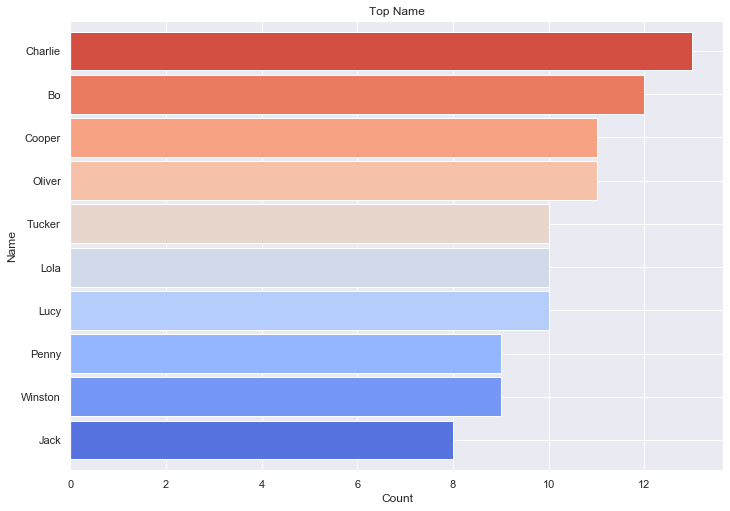

In [44]:
twitter_df2.name.value_counts()[:10].sort_values(ascending=True).plot.barh(width=0.9,color=sns.color_palette('coolwarm',10))
plt.title('Top Name')
set_label('Count', 'Name')

Based on the above, it seems that Charlie is the most popular name, followed by Bo.

## Is there a correlation between retweet count and favorite count?

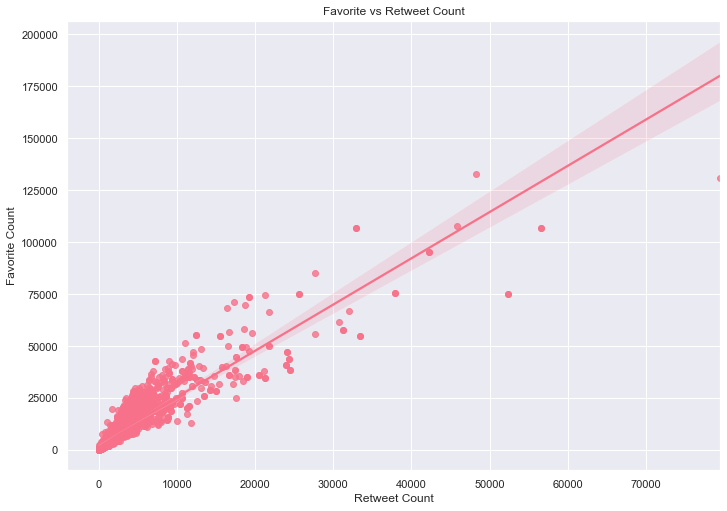

In [45]:
sns.set_palette("husl")
sns.regplot(x='retweet_count',y='favorite_count', data=twitter_df2);
set_label("Retweet Count", "Favorite Count");

plt.title('Favorite vs Retweet Count');

From the above, it seems like there could be a correlation between favorite count and retweet count.

## Is there any pattern for the rating given in the tweet?

First we try to look at pattern based on the time the tweet was made.

Text(0.5, 1.0, 'The median rating of dog tweet per day')

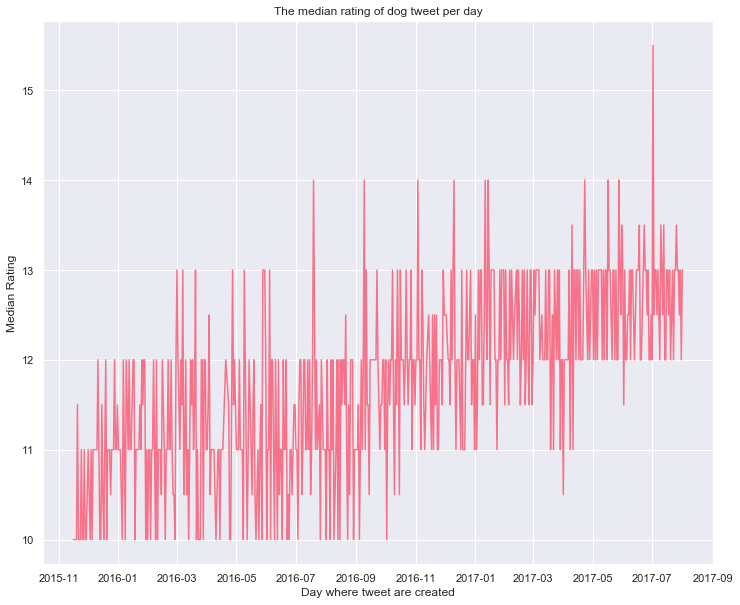

In [46]:
twitter_df2['created_at'] = pd.to_datetime(twitter_df2.created_at)

plt.subplots(figsize=(12,10))
twitter_df2.groupby(twitter_df2['created_at'].dt.date).median()['rating_numerator'].plot()
set_label('Day where tweet are created', 'Median Rating')
plt.title('The median rating of dog tweet per day')

The above plot, although unclear, seems to indicate an increase in the rating of the dog given. Let's show it more clearly by dividing it to bigger interval.

Text(0.5, 1.0, 'The median rating of dog tweet per month')

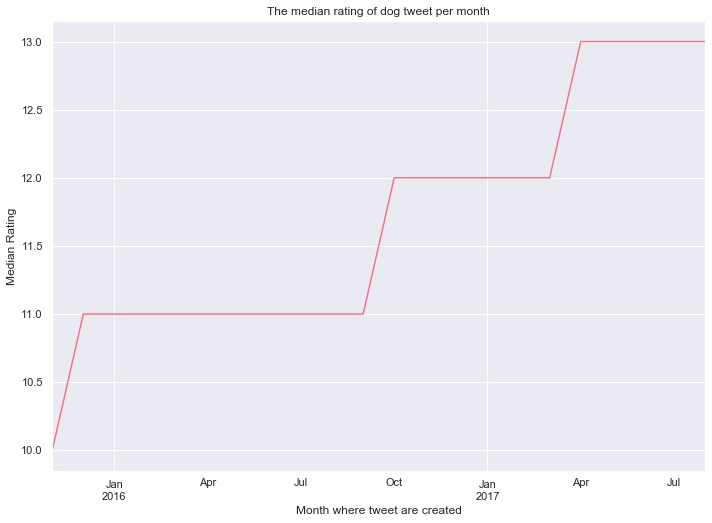

In [47]:
twitter_df2.groupby(twitter_df2['created_at'].dt.to_period("M")).median()['rating_numerator'].plot()
set_label('Month where tweet are created', 'Median Rating')
plt.title('The median rating of dog tweet per month')

## Does @weRateDogs tweets more dog rating as it gains popularity?

Let's first plot the number of tweet data per month.

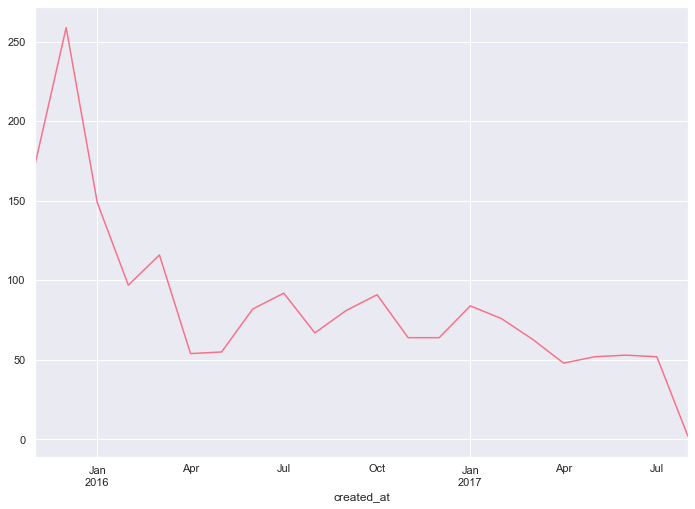

In [48]:
twitter_df2.groupby(twitter_df2['created_at'].dt.to_period("M")).count()['id'].plot();

Ignoring the sharp drop in July 2017, which might be due to the time we gather data, the plot above shows that @weRateDogs does not become more active in rating dogs as the month goes by. Actually, the tweet count has tendency to decrease.

## How about the retweet count and the favorite count per month?

To measure the account popularity, it is better to use the median of the retweet count and favorite count instead of the sum, as median is less affected by outlier and the sum may be affected by the number of tweets made per month, which differs each month.

Text(0.5, 1.0, 'Median of Favorite Count and Retweet Count for each month')

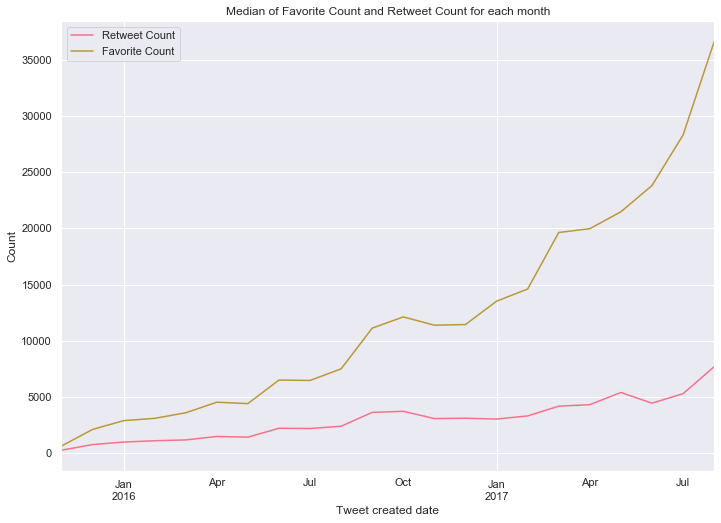

In [49]:
twitter_df2.groupby(twitter_df2['created_at'].dt.to_period("M")).median()['retweet_count'].plot(label='Retweet Count')
twitter_df2.groupby(twitter_df2['created_at'].dt.to_period("M")).median()['favorite_count'].plot(label='Favorite Count')

plt.legend()
set_label('Tweet created date', 'Count')
plt.title('Median of Favorite Count and Retweet Count for each month')

From the above, we can see that there is tendency for retweet count and favorite count to increase, despite the decrease of the number of dog rating tweet made.


## How confidence is the image prediction?

Text(0, 0.5, 'Confidence')

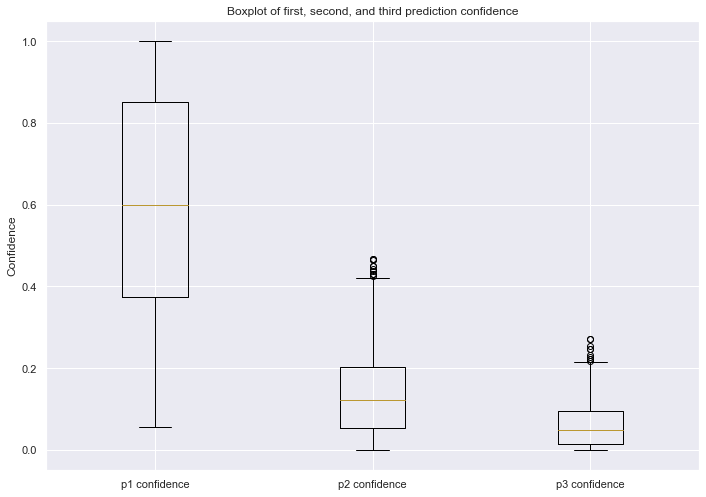

In [110]:
fig = plt.figure()
ax = fig.add_subplot(111)
plot = ax.boxplot([
    twitter_df2.p1_conf[twitter_df2.p1_conf.notnull()],
    twitter_df2.p2_conf[twitter_df2.p2_conf.notnull()],
    twitter_df2.p3_conf[twitter_df2.p3_conf.notnull()]], 
    labels=[
    'p1 confidence', 'p2 confidence', 'p3 confidence'])
plt.title('Boxplot of first, second, and third prediction confidence')
plt.ylabel('Confidence')

From the above, we can see that first prediction tend to have higher confidence than the second and third prediction. We can also see that for the first prediction, the more than 50% of the image has more than 50% confidence.